In [7]:
%matplotlib inline
import cPickle
import matplotlib.pyplot as plt
import mayavi.mlab as mlab
import numpy as np
import os
import scipy.io as sio
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [4]:
BASE_PATH = r"..\reconstruction\2017_04_22_09_10_00"
with open(os.path.join(BASE_PATH, "export_data.pkl"), "rb") as f:
    data = cPickle.load(f)
grid = sio.loadmat(os.path.join(BASE_PATH, "grid.mat"))

In [5]:
X, Y, Z = np.meshgrid(grid["X"], grid["Y"], grid["Z"])

In [6]:
visibility = 0 
for k in data.keys():
    visibility +=  data[k]["Visibility"]
vis = np.zeros_like(visibility)
vis[visibility > 2] = 1

In [ ]:
s = mlab.pipeline.scalar_field(X, Y, Z, vis)
s.spacing = [1, 1, 1]
s.update_image_data = True    
mlab.pipeline.image_plane_widget(s,
                            plane_orientation='x_axes',
                            slice_index=10,
                        )
mlab.pipeline.image_plane_widget(s,
                            plane_orientation='y_axes',
                            slice_index=10,
                        )
mlab.outline()
mlab.show()

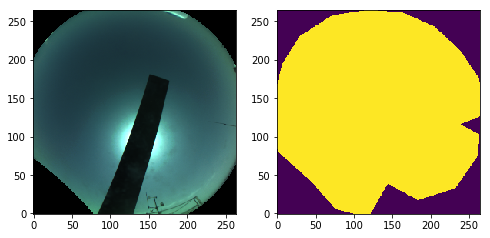

In [12]:
ids = sorted(data.keys())

@interact(ind=(0, 9), intensity=(1, 100))
def plot(ind, intensity):
    f, axes = plt.subplots(ncols=2, figsize=(8, 16))
    cam = data[ids[ind]]
    img = np.dstack((cam["R"], cam["G"], cam["B"]))
    img = np.clip(img/intensity, 0, 1)
    axes[0].imshow(img, origin="bottom", interpolation="nearest")
    axes[1].imshow(cam["MASK"], origin="bottom", interpolation="nearest")
    plt.show()

In [ ]:
plt.imshow(cam["SUN_MASK"], origin="bottom")

In [ ]:
_, axes = plt.subplots(ncols=2)
axes[0].imshow(cam["PHI"], origin="bottom")
axes[0].set_title("PHI")
axes[1].imshow(cam["PSI"], origin="bottom")
axes[1].set_title("PSI")

In [ ]:
plt.imshow(cam["MASK"], origin="bottom")

In [ ]:
cam.keys()

In [ ]:
cam["extra_data"]

In [ ]:
cam["PHI"].min(), cam["PHI"].max()

In [ ]:
cam["PSI"].min(), cam["PSI"].max()

In [ ]:
plt.plot(cam["PHI"].flatten())

In [ ]:
from CameraNetwork.export import calcSunshaderMask
plt.imshow(calcSunshaderMask(img, grabcut_threshold=30.), origin="bottom")

In [ ]:
img.min()